### Preprocessing

In [1202]:
import pandas as pd
import re
import matplotlib.pyplot as plt

df1 = pd.read_csv('movies_kaggle_dataset.txt',sep=":::", header=None, index_col=0)
df1.columns = ['Title','Genre','Plot']
df1.Title = df1.Title.apply(lambda x: re.sub("\(.*\)", "", x).replace("\"", "").strip())
df1.Genre = df1.Genre.apply(lambda x: x.strip().title())

df2 = pd.read_csv('movie_plots_yts.csv',index_col=0)
df2.Plot = df2.Plot.apply(lambda x: re.sub("\\x97.*" , "", x).rstrip())
df2.columns = ['Title','Plot','Genre']

C:\Users\Jacopo\anaconda3\envs\tf-gpu\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [1203]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [1204]:
df1.head()

,Title,Genre,Plot
0,,,
1,Oscar et la dame rose,Drama,Listening in to a conversation between his do...
2,Cupid,Thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful",Adult,As the bus empties the students for their fie...
4,The Secret Sin,Drama,To help their unemployed father make ends mee...
5,The Unrecovered,Drama,The film's title refers not only to the un-re...


In [1205]:
df2.head()

,Title,Plot,Genre
0,Who is Amos Otis?,"After assassinating the President, Amos Otis p...",Drama
1,Wheel of Time,Wheel of Time is Werner Herzog's photographed ...,Documentary
3,'B' Girl Rhapsody,Burlesque beauties performing their signature ...,Drama
5,The Brass Bottle,After being released from his bottle by Harold...,"Comedy, Fantasy"
6,The Morning After,The Morning After is a feature film that consi...,"Comedy, Drama"


In [1206]:
df1.Plot.values[2901], df2.Plot.values[2901]

(' Two people struggle to find meaning in their otherwise deceptively empty lives. Milly and Jean are two old friends who reunite with pleasantries, tea, and biscuits. Soon they reveal their dissatisfaction with the world to one another, but will their connection be enough to pull them through?',
 'This feature documentary tells the inside story behind the hunt for ISIS poster boy "Jihadi John" by the US and British military and intelligence services. It interrogates the twisted worldview espoused by ISIS - the richest and most notorious Islamist terrorist organisation in history - and its propaganda machine which was operated by "Jihadi millennials" who turned social media sites such as Twitter and YouTube into recruitment platforms. This is the definitive story about the formation and collapse of ISIS as a "state", told through extraordinary first-hand accounts of key counter-terrorism and intelligence officials who identified "Jihadi John" as British terrorist Mohammed Emwazi - and 

In [1207]:
df_final = pd.concat([df1,df2]).drop_duplicates("Title")

In [1208]:
print(df_final.shape)
#cleaning on plot
searchfor = [' sa ', ' la ', ' est ', ' il ', ' chi ', ' è ', ' ist ', ' y ', ' und ', 'capítulo', 'tiempo', ' for translation', ' og ', ' ein ', ' pas ', ' er ', 'WWF', 'WWE','Wrestling', ' dans ']
df_final = df_final[~df_final.Plot.str.contains('|'.join(searchfor))]

#cleaning on genre
df_final = df_final[~df_final.Genre.str.contains("Tv|Show|News")]

print(df_final.shape)

(81487, 3)
(79218, 3)


In [1209]:
df = df_final[df_final.Plot.str.len() >300]
print(df.shape)
df.head()

(58141, 3)


,Title,Genre,Plot
1,Oscar et la dame rose,Drama,Listening in to a conversation between his do...
3,"Young, Wild and Wonderful",Adult,As the bus empties the students for their fie...
4,The Secret Sin,Drama,To help their unemployed father make ends mee...
5,The Unrecovered,Drama,The film's title refers not only to the un-re...
6,Quality Control,Documentary,Quality Control consists of a series of 16mm ...


In [1210]:
df['Plot'] = df['Plot'].apply(lambda x : re.sub("\(.*\)", "", x))

C:\Users\Jacopo\AppData\Local\Temp/ipykernel_18364/173546020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot'] = df['Plot'].apply(lambda x : re.sub("\(.*\)", "", x))


### Doc embeddings

In [1212]:
from gensim.models.doc2vec import TaggedDocument

data = list()
for row in df.iterrows():
    title = row[1][0]
    plot = row[1][2]
    genre = row[1][1].replace(" ","").lower().split(",")
    title_doc = title.lower().split(" ")
    tagged_doc = re.split('[\W\d_]+', plot.lower())
    #tagged_doc.extend(genre)
    #tagged_doc.extend(title_doc)
    tagged_doc = [w for w in tagged_doc if w != '']
    
    data.append(TaggedDocument(tagged_doc,[title]))
    
    
data[1]

TaggedDocument(words=['as', 'the', 'bus', 'empties', 'the', 'students', 'for', 'their', 'field', 'trip', 'to', 'the', 'museum', 'of', 'natural', 'history', 'little', 'does', 'the', 'tour', 'guide', 'suspect', 'that', 'the', 'students', 'are', 'there', 'for', 'more', 'than', 'just', 'another', 'tour', 'first', 'during', 'the', 'lecture', 'films', 'the', 'coeds', 'drift', 'into', 'dreams', 'of', 'the', 'most', 'erotic', 'fantasies', 'one', 'can', 'imagine', 'after', 'the', 'films', 'they', 'release', 'the', 'emotion', 'of', 'the', 'fantasies', 'in', 'the', 'most', 'erotic', 'and', 'uncommon', 'ways', 'one', 'slips', 'off', 'to', 'the', 'curator', 's', 'office', 'for', 'a', 'little', 'acquisition', 'another', 'finds', 'the', 'anthropologist', 'to', 'see', 'what', 'bones', 'can', 'be', 'identified', 'even', 'the', 'head', 'teacher', 'isn', 't', 'immune', 'soon', 'the', 'tour', 'is', 'over', 'but', 'as', 'the', 'bus', 'departs', 'everyone', 'admits', 'it', 'was', 'quite', 'an', 'education']

In [1213]:
import logging
import multiprocessing
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
cores = multiprocessing.cpu_count()
cores

12

In [1244]:
from gensim.models import Doc2Vec
model = Doc2Vec(data, vector_size=200, window=8, min_count=7, epochs=20, workers=cores)

2022-01-08 14:23:21,174 : INFO : collecting all words and their counts
2022-01-08 14:23:21,176 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-01-08 14:23:21,400 : INFO : PROGRESS: at example #10000, processed 1126952 words (5071026/s), 46938 word types, 10000 tags
2022-01-08 14:23:21,646 : INFO : PROGRESS: at example #20000, processed 2243830 words (4546799/s), 66146 word types, 20000 tags
2022-01-08 14:23:21,890 : INFO : PROGRESS: at example #30000, processed 3349655 words (4563403/s), 80950 word types, 30000 tags
2022-01-08 14:23:22,135 : INFO : PROGRESS: at example #40000, processed 4464154 words (4549720/s), 93871 word types, 40000 tags
2022-01-08 14:23:22,379 : INFO : PROGRESS: at example #50000, processed 5510635 words (4320629/s), 103713 word types, 50000 tags
2022-01-08 14:23:22,966 : INFO : collected 110250 word types and 58141 unique tags from a corpus of 58141 examples and 6360130 words
2022-01-08 14:23:22,967 : INFO : Creating a fresh v

2022-01-08 14:23:49,679 : INFO : worker thread finished; awaiting finish of 10 more threads
2022-01-08 14:23:49,683 : INFO : worker thread finished; awaiting finish of 9 more threads
2022-01-08 14:23:49,687 : INFO : worker thread finished; awaiting finish of 8 more threads
2022-01-08 14:23:49,695 : INFO : worker thread finished; awaiting finish of 7 more threads
2022-01-08 14:23:49,712 : INFO : worker thread finished; awaiting finish of 6 more threads
2022-01-08 14:23:49,720 : INFO : worker thread finished; awaiting finish of 5 more threads
2022-01-08 14:23:49,723 : INFO : worker thread finished; awaiting finish of 4 more threads
2022-01-08 14:23:49,725 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-01-08 14:23:49,730 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-01-08 14:23:49,732 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-01-08 14:23:49,735 : INFO : worker thread finished; awaiting finish of 0 more thread

2022-01-08 14:24:22,901 : INFO : EPOCH 7 - PROGRESS: at 83.05% examples, 552750 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:24:23,934 : INFO : EPOCH 7 - PROGRESS: at 95.25% examples, 550148 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:24:24,166 : INFO : worker thread finished; awaiting finish of 11 more threads
2022-01-08 14:24:24,192 : INFO : worker thread finished; awaiting finish of 10 more threads
2022-01-08 14:24:24,198 : INFO : worker thread finished; awaiting finish of 9 more threads
2022-01-08 14:24:24,206 : INFO : worker thread finished; awaiting finish of 8 more threads
2022-01-08 14:24:24,213 : INFO : worker thread finished; awaiting finish of 7 more threads
2022-01-08 14:24:24,231 : INFO : worker thread finished; awaiting finish of 6 more threads
2022-01-08 14:24:24,234 : INFO : worker thread finished; awaiting finish of 5 more threads
2022-01-08 14:24:24,240 : INFO : worker thread finished; awaiting finish of 4 more threads
2022-01-08 14:24:24,241 : INFO : worker th

2022-01-08 14:24:54,040 : INFO : EPOCH 11 - PROGRESS: at 43.95% examples, 528022 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:24:55,048 : INFO : EPOCH 11 - PROGRESS: at 55.52% examples, 532275 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:24:56,049 : INFO : EPOCH 11 - PROGRESS: at 66.81% examples, 534539 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:24:57,054 : INFO : EPOCH 11 - PROGRESS: at 78.71% examples, 536086 words/s, in_qsize 24, out_qsize 0
2022-01-08 14:24:58,060 : INFO : EPOCH 11 - PROGRESS: at 90.75% examples, 536381 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:24:58,694 : INFO : worker thread finished; awaiting finish of 11 more threads
2022-01-08 14:24:58,723 : INFO : worker thread finished; awaiting finish of 10 more threads
2022-01-08 14:24:58,725 : INFO : worker thread finished; awaiting finish of 9 more threads
2022-01-08 14:24:58,728 : INFO : worker thread finished; awaiting finish of 8 more threads
2022-01-08 14:24:58,738 : INFO : worker thread finished; aw

2022-01-08 14:25:25,572 : INFO : EPOCH 15 - PROGRESS: at 10.85% examples, 527685 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:25:26,574 : INFO : EPOCH 15 - PROGRESS: at 21.79% examples, 525675 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:25:27,580 : INFO : EPOCH 15 - PROGRESS: at 33.42% examples, 538713 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:25:28,590 : INFO : EPOCH 15 - PROGRESS: at 45.49% examples, 546868 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:25:29,610 : INFO : EPOCH 15 - PROGRESS: at 57.14% examples, 547400 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:25:30,610 : INFO : EPOCH 15 - PROGRESS: at 68.54% examples, 547297 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:25:31,611 : INFO : EPOCH 15 - PROGRESS: at 80.60% examples, 547425 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:25:32,613 : INFO : EPOCH 15 - PROGRESS: at 92.27% examples, 544791 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:25:33,106 : INFO : worker thread finished; awaiting finish of 11 m

2022-01-08 14:25:58,965 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-01-08 14:25:58,967 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-01-08 14:25:58,973 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-01-08 14:25:58,974 : INFO : EPOCH - 18 : training on 6360130 raw words (4738952 effective words) took 8.6s, 548462 effective words/s
2022-01-08 14:25:59,985 : INFO : EPOCH 19 - PROGRESS: at 10.22% examples, 501601 words/s, in_qsize 24, out_qsize 0
2022-01-08 14:26:00,992 : INFO : EPOCH 19 - PROGRESS: at 20.42% examples, 492873 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:26:02,000 : INFO : EPOCH 19 - PROGRESS: at 31.77% examples, 511593 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:26:03,004 : INFO : EPOCH 19 - PROGRESS: at 43.33% examples, 521669 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:26:04,041 : INFO : EPOCH 19 - PROGRESS: at 55.04% examples, 525679 words/s, in_qsize 23, out_qsize 0
2022-01-08 14:

In [1245]:
df[df.Title.str.contains('Star Wars')]

,Title,Genre,Plot
15048,The Stories: The Making of 'Rogue One: A Star ...,Documentary,Divided 10 segments: A Rogue Idea: A recount ...
26838,Star Wars: Star Warriors,Documentary,Some Star Wars fans want to collect action fi...
34504,Star Wars Begins: A Filmumentary,Documentary,Filmmaker Jamie Benning has finally finished ...
36672,Elimination: A Star Wars Story,Sci-Fi,This story depicts the downfall of the Jedi K...
37475,Lego Star Wars III: The Clone Wars,Sci-Fi,Anakin Skywalker and other Jedi fight their w...
42312,Star Wars: Will of the Force - An Independent ...,Sci-Fi,The story is set in the Star Wars universe cr...
42788,The Making of 'Star Wars',Documentary,Ever wonder how they ever managed to make a m...
49913,Star Wars: The Old Republic - Rise of the Hutt...,Action,"With the Sith emperor defeated, the republic ..."
2623,Lego Star Wars Terrifying Tales,"Action, Adventure, Animation",After the events of Star Wars: Episode IX - Th...
10692,Star Wars: The Clone Wars,"Action, Adventure, Animation, Family, Fantasy,...","As the Clone Wars sweep through the galaxy, th..."


In [1261]:
template_film_list = ["The Lord of the Rings","Hitman","Interstellar","Star Wars: The Clone Wars"]
film = "The Lord of the Rings"
similar = model.dv.most_similar(film, topn=15)
print("Film -->",film,df[df.Title == film]['Genre'].values[0],sep='\t')
print("Most similar:\t")
print(*((title, dist, df[df.Title == title]['Genre'].values[0]) for title, dist in similar), sep='\n')

Film -->	The Lord of the Rings	Action, Adventure, Animation, Fantasy
Most similar:	
('The Lord of the Rings: The Fellowship of the Ring', 0.5826036930084229, 'Action, Adventure, Drama, Fantasy')
('Khoj, the Search', 0.5591670870780945, 'Action')
('Scorpion', 0.5587550401687622, 'Action')
('The Bulls of Suburbia', 0.555827260017395, 'Documentary')
('The Lord of the Rings: The Two Towers', 0.5532493591308594, 'Action, Adventure, Drama, Family, Fantasy')
('The Land Before Time', 0.5530036687850952, 'Action, Adventure, Animation, Drama, Family, Fantasy')
('The Hobbit', 0.5481148958206177, 'Fantasy')
('I Love Wing Chun', 0.5479956269264221, 'Action, Comedy')
('Pumpkin Moon', 0.5414577126502991, 'Animation')
('Hutong Days', 0.5365427732467651, 'Drama')
('John Wick: Chapter 3 - Parabellum', 0.5358834862709045, 'Action, Crime, Thriller')
('Star Wars: The Force Awakens', 0.5355278253555298, 'Action, Adventure, Fantasy, Sci-Fi, Thriller')
('Sylvan', 0.5317610502243042, 'Animation')
("Dragonheart

In [1247]:
model.wv.most_similar([model.dv["The Lord of the Rings: The Two Towers"]])

[('ivor', 0.5724335312843323),
 ('koga', 0.5540127754211426),
 ('rothschild', 0.534881591796875),
 ('bavmorda', 0.5308581590652466),
 ('het', 0.5251602530479431),
 ('juventud', 0.519444465637207),
 ('kersey', 0.5100961327552795),
 ('geng', 0.509765088558197),
 ('irreversibly', 0.5097379684448242),
 ('jethro', 0.5084015130996704)]

In [1248]:
model.wv.most_similar('dog')

[('dogs', 0.5296138525009155),
 ('pet', 0.5184677839279175),
 ('mutt', 0.493613064289093),
 ('pup', 0.4418664872646332),
 ('stray', 0.4331141412258148),
 ('cat', 0.4262319803237915),
 ('reindeer', 0.4256390929222107),
 ('elf', 0.4246595501899719),
 ('canine', 0.4187239110469818),
 ('horse', 0.4139213263988495)]

### Representation

##### TSNE model for dimensionality reduction

In [1249]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X = [model.dv[i] for i in range(len(model.dv))]
doc_tags = model.dv.index_to_key
# Fit and transform a t-SNE object with the vector data for dimensionality reduction
tsne = TSNE(n_components=2, verbose=3, n_jobs=6)
X_tsne = tsne.fit_transform(X)

C:\Users\Jacopo\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Jacopo\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 58141 samples in 0.010s...
[t-SNE] Computed neighbors for 58141 samples in 104.319s...
[t-SNE] Computed conditional probabilities for sample 1000 / 58141
[t-SNE] Computed conditional probabilities for sample 2000 / 58141
[t-SNE] Computed conditional probabilities for sample 3000 / 58141
[t-SNE] Computed conditional probabilities for sample 4000 / 58141
[t-SNE] Computed conditional probabilities for sample 5000 / 58141
[t-SNE] Computed conditional probabilities for sample 6000 / 58141
[t-SNE] Computed conditional probabilities for sample 7000 / 58141
[t-SNE] Computed conditional probabilities for sample 8000 / 58141
[t-SNE] Computed conditional probabilities for sample 9000 / 58141
[t-SNE] Computed conditional probabilities for sample 10000 / 58141
[t-SNE] Computed conditional probabilities for sample 11000 / 58141
[t-SNE] Computed conditional probabilities for sample 12000 / 58141
[t-SNE] Computed conditional probabilities for s

In [1250]:
df_tsne = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
df_tsne['genre'] = df[df.Title.isin(doc_tags)].Genre.values
df_tsne.head(60)

,x,y,genre
Oscar et la dame rose,-2.760807,4.104101,Drama
"Young, Wild and Wonderful",6.161946,3.130395,Adult
The Secret Sin,2.912805,-13.663604,Drama
The Unrecovered,-6.147918,10.490568,Drama
Quality Control,11.076579,5.403933,Documentary
Pink Slip,-4.596486,0.943102,Comedy
One Step Away,-1.567383,-0.819284,Crime
Spirits,3.243757,-0.444293,Horror
The Spirit World: Ghana,0.565436,4.392361,Documentary
Pink Ribbons: One Small Step,5.442424,4.354671,Documentary


##### Visualization

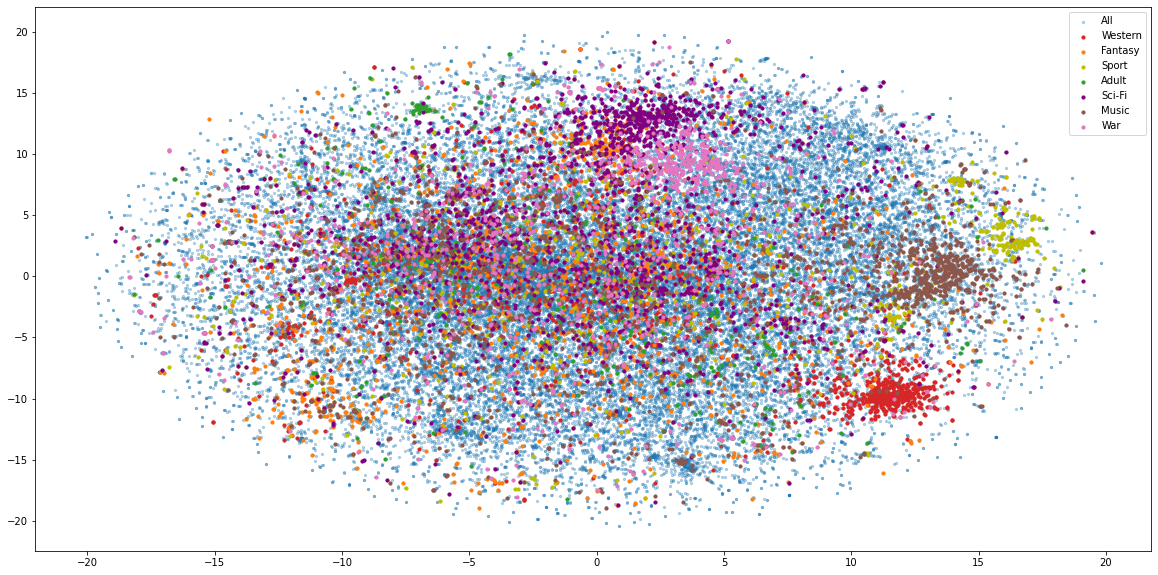

In [1251]:
genres = ['Western','Fantasy','Sport','Adult','Sci-Fi','Music','War']
colors = ["tab:red", "tab:orange", "y","tab:green", "purple", "tab:brown", "tab:pink","springgreen",'navy','gold']

plt.figure(figsize=(20,10))
plt.scatter(df_tsne['x'], df_tsne['y'], s=5, alpha=0.3,color='tab:blue',label='All')
for genre, color in zip(genres, colors):
    temp_df = df_tsne[df_tsne.genre.str.contains(genre)]
    plt.scatter(temp_df['x'],temp_df['y'],s=10,c=color, label=genre)
    
plt.legend()
plt.show()

In [1235]:
set([g.strip() for row in df.Genre for g in row.split(",")])

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}